## Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


##  Open Dataset

In [ ]:
df = pd.read_csv('Sample - Superstore.csv', encoding='ISO-8859-1')

## Analyze the structure of the dataset

In [ ]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

Dataset contains 9994 rows and 21 columns


In [ ]:
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [ ]:
print("\nData types:")
print(df.dtypes)


Data types:
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


In [ ]:
df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
# Convert date columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

## Calculate the total Profit

In [ ]:
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
profit_margin = (total_profit / total_sales) * 100

print(f"\nTotal Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Overall Profit Margin: {profit_margin:.2f}%")



Total Sales: $2,297,200.86
Total Profit: $286,397.02
Overall Profit Margin: 12.47%


## Sales and Profit by Category

In [ ]:

category_performance = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)
category_performance['Profit Margin'] = (category_performance['Profit'] / category_performance['Sales']) * 100
print("\nPerformance by Category:")
print(category_performance)



Performance by Category:
                       Sales       Profit  Profit Margin
Category                                                
Technology       836154.0330  145454.9481      17.395712
Furniture        741999.7953   18451.2728       2.486695
Office Supplies  719047.0320  122490.8008      17.035158


## Top and Bottom Performing Products By total Sales

In [ ]:

top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
bottom_products = df.groupby('Product Name')['Sales'].sum().sort_values().head(10)

print("\nTop 10 Products by Sales:")
print(top_products)
print("\nBottom 10 Products by Sales:")
print(bottom_products)


Top 10 Products by Sales:
Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64

Bottom 10 Products by Sales:
Product Name

## Calculate the sales and profit by Region

In [ ]:
regional_performance = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)
regional_performance['Profit Margin'] = (regional_performance['Profit'] / regional_performance['Sales']) * 100
print("\nPerformance by Region:")
print(regional_performance)


Performance by Region:
               Sales       Profit  Profit Margin
Region                                          
West     725457.8245  108418.4489      14.944831
East     678781.2400   91522.7800      13.483399
Central  501239.8908   39706.3625       7.921629
South    391721.9050   46749.4303      11.934342


## Customer Segment Analysis

In [ ]:
segment_performance = df.groupby('Segment')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)
segment_performance['Profit Margin'] = (segment_performance['Profit'] / segment_performance['Sales']) * 100
print("\nPerformance by Customer Segment:")
print(segment_performance)


Performance by Customer Segment:
                    Sales       Profit  Profit Margin
Segment                                              
Consumer     1.161401e+06  134119.2092      11.548050
Corporate    7.061464e+05   91979.1340      13.025506
Home Office  4.296531e+05   60298.6785      14.034269


##  Monthly Sales analysis

In [ ]:
df['Order Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Order Month')['Sales'].sum()
print(monthly_sales)

Order Month
2014-01     14236.8950
2014-02      4519.8920
2014-03     55691.0090
2014-04     28295.3450
2014-05     23648.2870
2014-06     34595.1276
2014-07     33946.3930
2014-08     27909.4685
2014-09     81777.3508
2014-10     31453.3930
2014-11     78628.7167
2014-12     69545.6205
2015-01     18174.0756
2015-02     11951.4110
2015-03     38726.2520
2015-04     34195.2085
2015-05     30131.6865
2015-06     24797.2920
2015-07     28765.3250
2015-08     36898.3322
2015-09     64595.9180
2015-10     31404.9235
2015-11     75972.5635
2015-12     74919.5212
2016-01     18542.4910
2016-02     22978.8150
2016-03     51715.8750
2016-04     38750.0390
2016-05     56987.7280
2016-06     40344.5340
2016-07     39261.9630
2016-08     31115.3743
2016-09     73410.0249
2016-10     59687.7450
2016-11     79411.9658
2016-12     96999.0430
2017-01     43971.3740
2017-02     20301.1334
2017-03     58872.3528
2017-04     36521.5361
2017-05     44261.1102
2017-06     52981.7257
2017-07     45264.4160

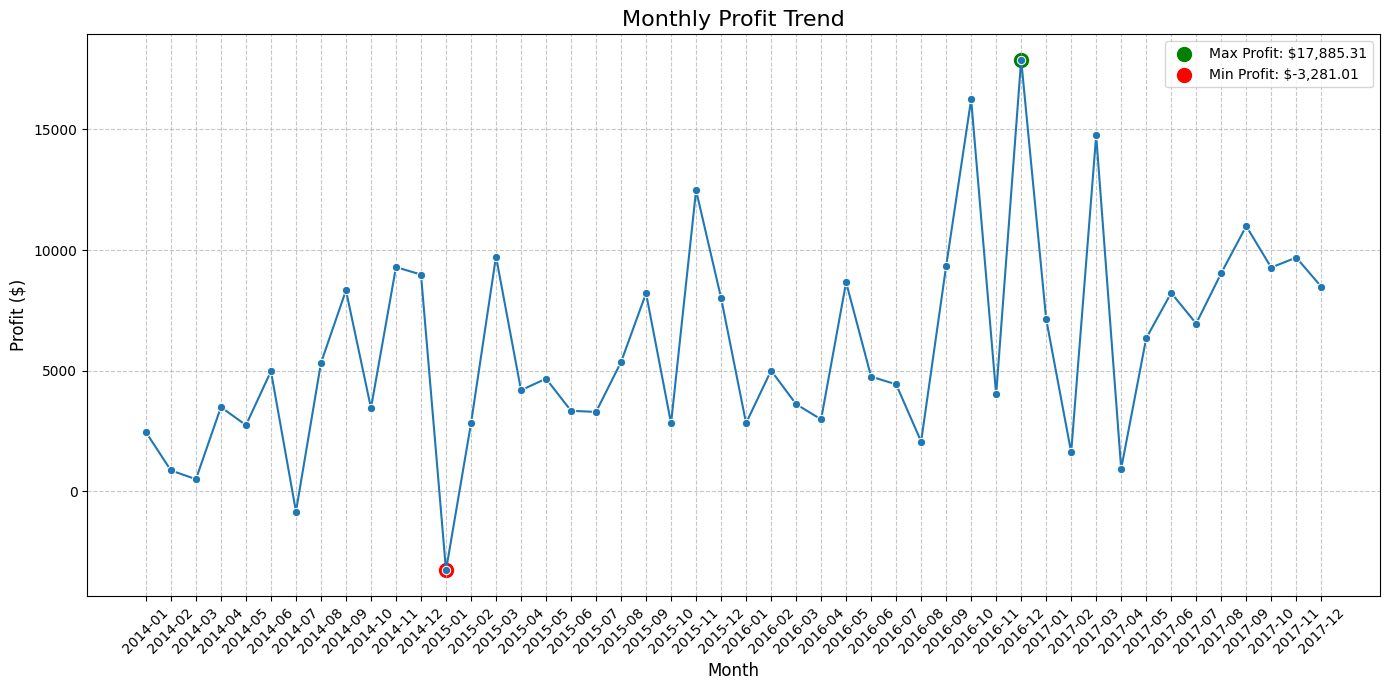

In [ ]:
df['Order Month'] = df['Order Date'].dt.to_period('M')

monthly_profits = df.groupby('Order Month')['Profit'].sum().reset_index()
monthly_profits['Order Month'] = monthly_profits['Order Month'].astype(str)

plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_profits, x='Order Month', y='Profit', marker='o')

plt.title('Monthly Profit Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Profit ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

max_profit = monthly_profits['Profit'].max()
min_profit = monthly_profits['Profit'].min()
max_month = monthly_profits[monthly_profits['Profit'] == max_profit]['Order Month'].values[0]
min_month = monthly_profits[monthly_profits['Profit'] == min_profit]['Order Month'].values[0]

plt.scatter(x=max_month, y=max_profit, color='green', s=100, label=f'Max Profit: ${max_profit:,.2f}')
plt.scatter(x=min_month, y=min_profit, color='red', s=100, label=f'Min Profit: ${min_profit:,.2f}')

plt.legend()
plt.tight_layout()
plt.show()

## Impact of Discount on Profit

In [ ]:
discount_impact = df.groupby(pd.cut(df['Discount'], bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]))['Profit'].mean()
print("\nAverage Profit by Discount Range:")
print(discount_impact)



Average Profit by Discount Range:
Discount
(0.0, 0.1]     96.055074
(0.1, 0.2]     24.738824
(0.2, 0.3]    -45.679636
(0.3, 0.4]   -109.219691
(0.4, 0.5]   -298.695314
(0.5, 0.6]    -43.077212
(0.6, 0.7]    -95.874060
(0.7, 0.8]   -101.796797
(0.8, 0.9]           NaN
(0.9, 1.0]           NaN
Name: Profit, dtype: float64


/tmp/ipython-input-37-2230082641.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_impact = df.groupby(pd.cut(df['Discount'], bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]))['Profit'].mean()


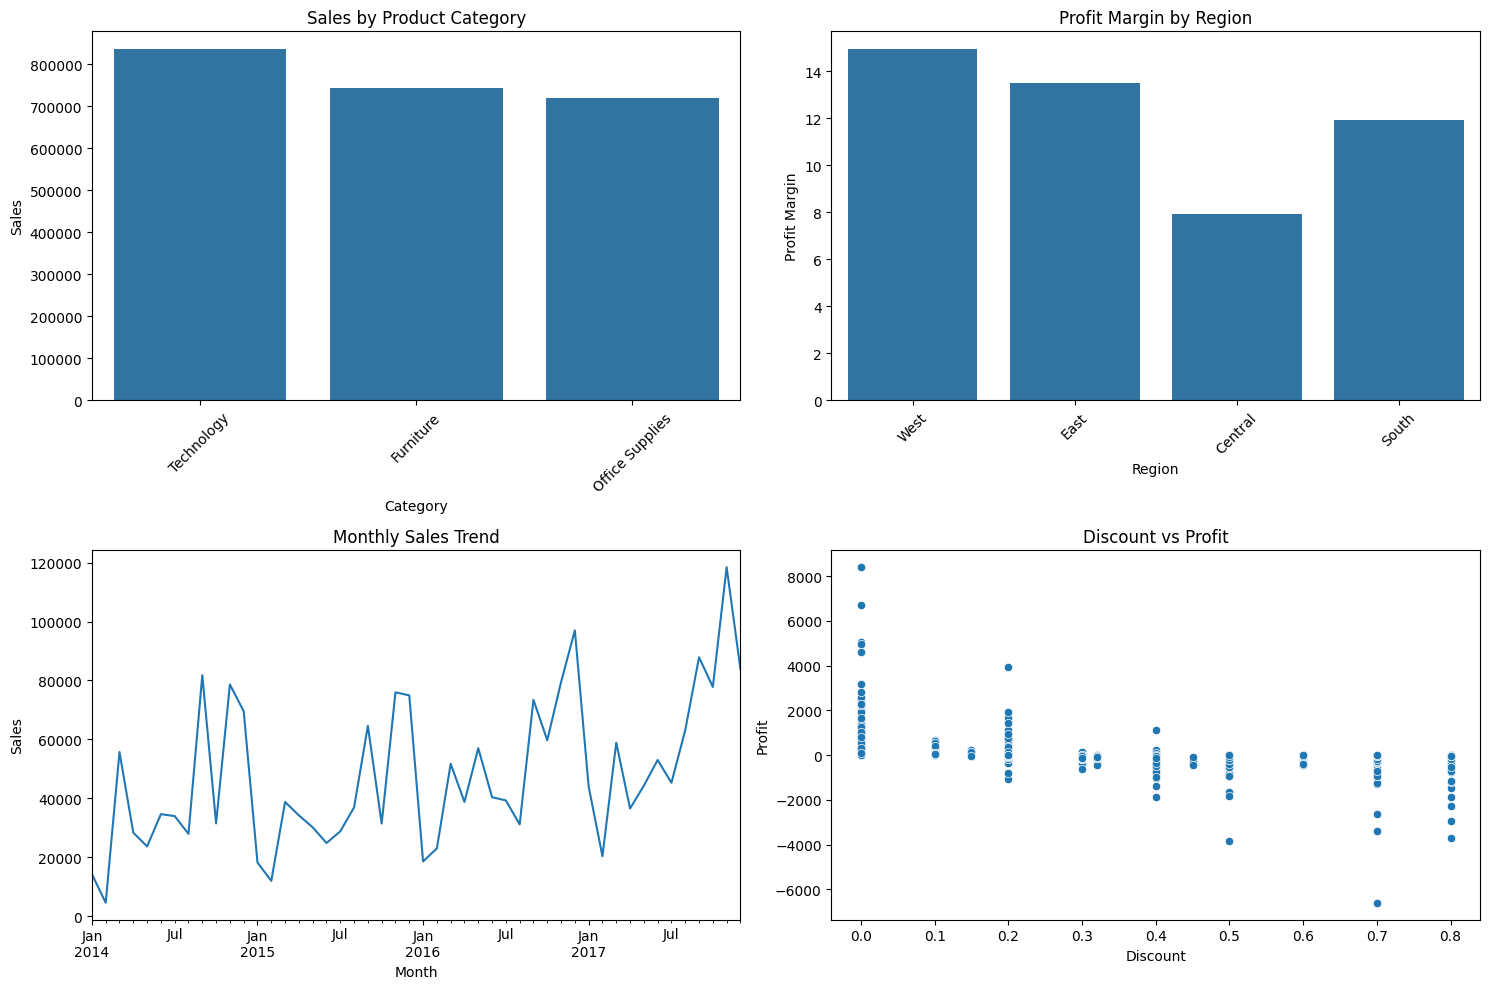

In [ ]:

# Visualization
plt.figure(figsize=(15, 10))

# Sales by Category
plt.subplot(2, 2, 1)
sns.barplot(x=category_performance.index, y='Sales', data=category_performance)
plt.title('Sales by Product Category')
plt.xticks(rotation=45)

# Profit Margin by Region
plt.subplot(2, 2, 2)
sns.barplot(x=regional_performance.index, y='Profit Margin', data=regional_performance)
plt.title('Profit Margin by Region')
plt.xticks(rotation=45)

# Monthly Sales Trend
plt.subplot(2, 2, 3)
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')

# Discount vs Profit
plt.subplot(2, 2, 4)
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Discount vs Profit')

plt.tight_layout()
plt.show()


In [ ]:
# 8. Customer Analysis
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Customers by Sales:")
print(top_customers)



Top 10 Customers by Sales:
Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Name: Sales, dtype: float64


In [ ]:
# 9. Shipping Mode Analysis
shipping_performance = df.groupby('Ship Mode')[['Sales', 'Profit']].sum()
shipping_performance['Profit Margin'] = (shipping_performance['Profit'] / shipping_performance['Sales']) * 100
print("\nPerformance by Shipping Mode:")
print(shipping_performance)


Performance by Shipping Mode:
                       Sales       Profit  Profit Margin
Ship Mode                                               
First Class     3.514284e+05   48969.8399      13.934513
Same Day        1.283631e+05   15891.7589      12.380315
Second Class    4.591936e+05   57446.6354      12.510331
Standard Class  1.358216e+06  164088.7875      12.081202


In [ ]:
# 10. Product Subcategory Analysis
subcategory_performance = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)
subcategory_performance['Profit Margin'] = (subcategory_performance['Profit'] / subcategory_performance['Sales']) * 100
print("\nPerformance by Sub-Category:")
print(subcategory_performance)


Performance by Sub-Category:
                    Sales      Profit  Profit Margin
Sub-Category                                        
Phones        330007.0540  44515.7306      13.489327
Chairs        328449.1030  26590.1663       8.095673
Storage       223843.6080  21278.8264       9.506113
Tables        206965.5320 -17725.4811      -8.564460
Binders       203412.7330  30221.7633      14.857361
Machines      189238.6310   3384.7569       1.788618
Accessories   167380.3180  41936.6357      25.054700
Copiers       149528.0300  55617.8249      37.195585
Bookcases     114879.9963  -3472.5560      -3.022768
Appliances    107532.1610  18138.0054      16.867517
Furnishings    91705.1640  13059.1436      14.240358
Paper          78479.2060  34053.5693      43.391837
Supplies       46673.5380  -1189.0995      -2.547695
Art            27118.7920   6527.7870      24.071083
Envelopes      16476.4020   6964.1767      42.267582
Labels         12486.3120   5546.2540      44.418672
Fasteners       

## Sales and Profit by City


In [ ]:
city_performance = df.groupby('City')[['Sales', 'Profit']].sum()

top_cities_by_sales = city_performance.sort_values('Sales', ascending=False).head(10)
bottom_cities_by_profit = city_performance.sort_values('Profit', ascending=True).head(10)

print("\nTop 10 Cities by Sales:")
print(top_cities_by_sales)

print("\nBottom 10 Cities by Profit:")
print(bottom_cities_by_profit)


Top 10 Cities by Sales:
                     Sales      Profit
City                                  
New York City  256368.1610  62036.9837
Los Angeles    175851.3410  30440.7579
Seattle        119540.7420  29156.0967
San Francisco  112669.0920  17507.3854
Philadelphia   109077.0130 -13837.7674
Houston         64504.7604 -10153.5485
Chicago         48539.5410  -6654.5688
San Diego       47521.0290   6377.1960
Jacksonville    44713.1830  -2323.8350
Springfield     43054.3420   6200.6974

Bottom 10 Cities by Profit:
                    Sales      Profit
City                                 
Philadelphia  109077.0130 -13837.7674
Houston        64504.7604 -10153.5485
San Antonio    21843.5280  -7299.0502
Lancaster       9891.4640  -7239.0684
Chicago        48539.5410  -6654.5688
Burlington     21668.0820  -3622.8772
Dallas         20131.9322  -2846.5257
Phoenix        11000.2570  -2790.8832
Aurora         11656.4780  -2691.7386
Jacksonville   44713.1830  -2323.8350


## Order Frequency


In [ ]:
order_frequency = df.groupby('Customer ID')['Order ID'].nunique()
print("\nOrder Frequency per Customer:")
print(order_frequency.head())
print("\nSummary Description of Order Frequency:")
print(order_frequency.describe())

top_order_frequency = order_frequency.sort_values(ascending=False).head(10)
print("\nTop 10 Customers by Order Frequency:")
print(top_order_frequency)


Order Frequency per Customer:
Customer ID
AA-10315    5
AA-10375    9
AA-10480    4
AA-10645    6
AB-10015    3
Name: Order ID, dtype: int64

Summary Description of Order Frequency:
count    793.000000
mean       6.316520
std        2.550885
min        1.000000
25%        5.000000
50%        6.000000
75%        8.000000
max       17.000000
Name: Order ID, dtype: float64

Top 10 Customers by Order Frequency:
Customer ID
EP-13915    17
SH-19975    13
NS-18640    13
PG-18820    13
ZC-21910    13
EA-14035    13
JE-15745    13
CK-12205    13
AH-10690    12
RB-19465    12
Name: Order ID, dtype: int64


## Sales and profit visualization by subcategory



/tmp/ipython-input-26-1912593965.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcategory_performance.index, y='Sales', data=subcategory_performance, palette='viridis')
/tmp/ipython-input-26-1912593965.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcategory_performance.index, y='Profit', data=subcategory_performance, palette='plasma')


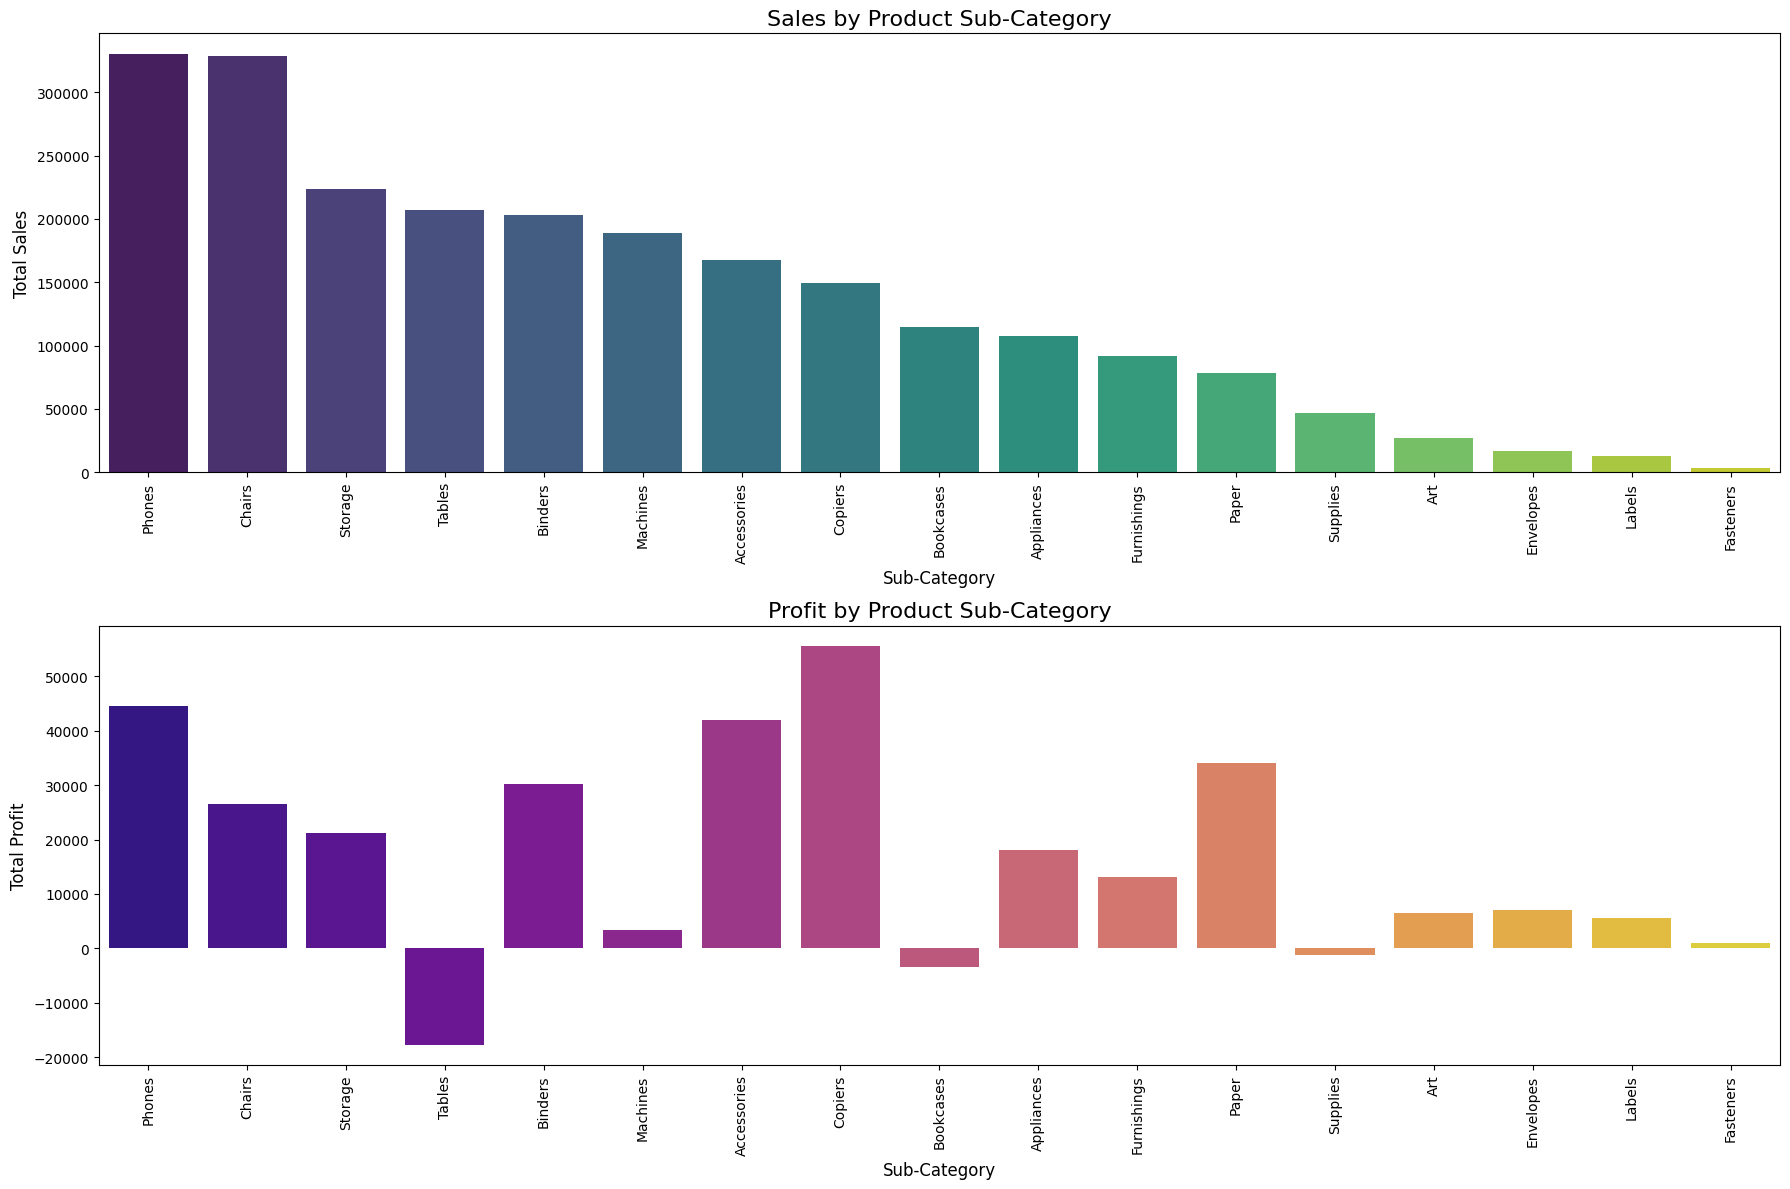

In [ ]:
plt.figure(figsize=(18, 12))

# Sales by Sub-Category
plt.subplot(2, 1, 1)
sns.barplot(x=subcategory_performance.index, y='Sales', data=subcategory_performance, palette='viridis')
plt.title('Sales by Product Sub-Category', fontsize=16)
plt.xlabel('Sub-Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=90)

# Profit by Sub-Category
plt.subplot(2, 1, 2)
sns.barplot(x=subcategory_performance.index, y='Profit', data=subcategory_performance, palette='plasma')
plt.title('Profit by Product Sub-Category', fontsize=16)
plt.xlabel('Sub-Category', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   New York City, Los Angeles, Seattle, San Francisco, and Philadelphia were the top 5 cities by total sales.
*   Philadelphia, Houston, San Antonio, Lancaster, and Chicago were the bottom 5 cities by total profit.
*   The 'Shipping Cost' column was not found in the dataset, so shipping cost analysis was skipped.
*   There are 793 unique customers in the dataset, with an average of approximately 6.32 orders per customer.
*   The maximum number of orders placed by a single customer was 17.
*   The returns data ('df\_returns') was not found, so the analysis of the impact of returns on sales and profit was skipped.
*   Visualizations were created to show total sales and total profit for each product sub-category.

